# Solutions to Introduction to Programming

Solutions to the first exercise (hand computation, basically): the exercise is to create the cells, input the numbers and the + sign into them, make sure it's a "Code" cell, then hold down the CTRL (Command) key and hit ENTER to have the addition executed.

In [1]:
1

1

In [2]:
0+1

1

In [3]:
1+1

2

In [4]:
1+2

3

In [5]:
2+3

5

In [6]:
3+5

8

In [7]:
5+8

13

In [8]:
8+13

21

In [9]:
13+21  # One more than was asked for

34

In [10]:
Lucas_List = [2,1]
for i in range(2,31):
    nxt = Lucas_List[i-1]+Lucas_List[i-2]
    Lucas_List.append(nxt)
print( Lucas_List )

[2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498]


From the [Online Encyclopedia of Integer Sequences, sequence A000032](https://oeis.org/A000032), we have that the Lucas sequence starts off with 2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498, 3010349, 4870847, 7881196, 12752043, 20633239, 33385282, 54018521, 87403803 .  The output of the program above agrees, as far as it goes.

In [11]:
Lucas_List = [2,1]
i = 2
while i<31:
    nxt = Lucas_List[i-1]+Lucas_List[i-2]
    Lucas_List.append(nxt)
    i += 1
print( Lucas_List )

[2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498]


The output is exactly the same as before.

In [12]:
Narayana_cows = [1,1,1]
for i in range(3,31):
    nxt = Narayana_cows[i-1] + Narayana_cows[i-3]
    Narayana_cows.append(nxt)
print( Narayana_cows )

[1, 1, 1, 2, 3, 4, 6, 9, 13, 19, 28, 41, 60, 88, 129, 189, 277, 406, 595, 872, 1278, 1873, 2745, 4023, 5896, 8641, 12664, 18560, 27201, 39865, 58425]


Comparing with the initial numbers at [the OEIS entry for A000930](https://oeis.org/A000930), namely, 1, 1, 1, 2, 3, 4, 6, 9, 13, 19, 28, 41, 60, 88, 129, 189, 277, 406, 595, 872, 1278, 1873, 2745, 4023, 5896, 8641, 12664, 18560, 27201, 39865, 58425, 85626, 125491, 183916, 269542, 395033, 578949, 848491, 1243524, 1822473, 2670964, 3914488, 5736961, 8407925, we see that the numbers are the same, as far as they go.

A google search turns up the [following Turtle Geometry in Python Fibonacci Spiral](https://youtu.be/AH6fygto3Mk) by DavisMT, which is a bit more advanced than we had in mind; but it works.

For the new spiral, we need a bit of pen-and-paper work first to work out the angles, and a consistent numbering scheme.  If we make one vertex of each triangle be the origin, it makes a nice picture with the triangles successively touching each other.  In this case it will work out better if we draw the picture first, then explain the code that drew the picture.

[0.0, 0.7227342478134157, 0.5856855434571508, 0.6435011087932843, 0.6223684885550206, 0.630568739599553]
0.6283185307179586


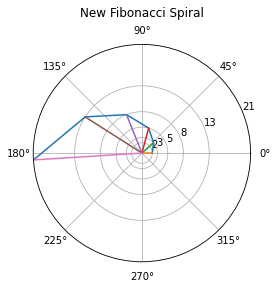

In [13]:
# Isosceles Fibonacci Triangle Spiral
Final_Triangle = 7  # We will draw triangles from the flat one on, and stop at a "Final Triangle"
# We will need one more Fibonacci number than triangles (because we throw the first one away )
Fibonacci = [0,1]
for i in range(2,Final_Triangle+2):
    nxt = Fibonacci[i-1]+Fibonacci[i-2]
    Fibonacci.append(nxt)
angle_cosines = [ Fibonacci[i]/(2*Fibonacci[i-1]) for i in range(3,Final_Triangle+2)]

# When writing this solution, print statements like the following 
# were very useful for debugging.  We have left them in, but commented them out
# so Python does not execute them (but you can see them)
# print( angle_cosines )

import numpy as np

# These are the small angles in the isosceles triangles
angles = [np.arccos(t) for t in angle_cosines ]

print( angles )  # Actually there is something interesting about these angles
print( np.pi/5 )

# We need the cumulative sums of those angles for our spiral
theta = np.cumsum( angles )

#print( theta )
r = [ Fibonacci[i] for i in range(3,Final_Triangle+2)]
#print( r, r[-1] )

import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) # same as before
# Plot the spiral (ie the outermost points of each triangle)
ax.plot(theta, r) # same as before

# Now plot the long sides of each triangle
for i in range(len(r)):
    ax.plot([0,theta[i]], [0, r[i]])

ax.set_rmax(r[-1]) # 
ax.set_rticks(r)  # Show Fibonacci radii for our plot
#ax.set_rlabel_position(-22.5)  # don't need this command
ax.grid(True) # same as before

ax.set_title("New Fibonacci Spiral", va='bottom') # change the title
plt.show()

There's lots to talk about in that code.  The "cumsum" function has an odd name (the same name as the corresponding function in Matlab) but it just replaces a list [x, y, z, w] with another list [x, x+y, x+y+z, x+y+z+w].  So, simple but useful.  We needed it because the _direction_ the final triangle is pointing has as its angle the sum of its internal angle plus all the angles of the previous triangles: the cumulative sum, in other words.  The final entry in a list can be referred to by asking for the "-1" entry, viz: r[-1] gives us the largest radius.  The counting was hard, because there is no (0,0,1) triangle, and the (1,1,2) triangle is flat and has internal angles 0 or 180 degrees (0 or $\pi$ radians, and of course the trig functions in Python use radians).  Python chose the colours of the lines, because we didn't specify them; the labels are a bit squashed up because we didn't try very hard to make this spiral pretty.  We _expect_ that you can already do better than this program.

We did not try to draw a smooth curve through the points, but a polar curve with radius $\phi^t/\sqrt{5}$ and angle linear in $t$ can be made to match these points pretty closely.  That's also not a bad exercise.

The interesting fact alluded to above, when we printed the angles, was that they very quickly settle down to $\pi/5$.  This is because $F_n/(2F_{n-1})$ very quickly settles down to $\phi/2$, and, which is a surprising fact, the angle whose cosine is $\phi/2$ is $\pi/5$.  There is a square root of 5 in $\phi$, and a $5$ in the radian measure of its arccosine; is this a coincidence?  You might want to try to _prove_ to yourself that these facts are true; if you manage it, you might simultaneously find a reason (or alternatively decide that it is, in fact, just a coincidence).  But that sort of thing is much more like traditional math, and so we reluctantly do not pursue it here.

Now we look at the exercises about the length (in bits) of Fibonacci numbers.  First we check that Binet's formula does a reasonable job:

In [14]:
phi = (1+np.sqrt(5))/2
def Binet(n):
    return( np.round( phi**n / np.sqrt(5)) )

print( Binet(10), Binet(100), Binet(1000) )

55.0 3.542248481792631e+20 4.3466557686938915e+208


In [15]:
def fibo(n):
    prev = 0
    curr = 1
    for i in range(2,n+1):
        fib = curr + prev
        prev = curr
        curr = fib
    return( fib )

print( fibo(10), fibo(100), fibo(1000))

55 354224848179261915075 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875


Those numbers agree (up to floating-point error) and so we accept the formula $F_n \approx \phi^n/\sqrt{5}$.  Since we are told that the length (in bits) of $F_n$ has something to do with $\log_2 F_n$, we think for a bit and realize that it actually takes $\lceil \log_2 F_n \rceil$ bits, where the _ceiling_ of a real number $x$, namely $\lceil x \rceil$, is defined as the integer you get when you round _up_ (alternatively, it is the smallest integer greater than or equal to $x$).  Now we try to simplify
$$
\log_2 F_n \approx \log_2 \left( \frac{\phi^n}{\sqrt5} \right) = n\log_2 \phi - \log_2\sqrt{5} \approx n \ln \phi/\ln 2. 
$$
By simple computation, we have $\ln \phi/\ln 2 \approx 0.4812/0.6931 \approx 0.6942 $.  This predicts that the number of bits needed to represent $F_n$ should be _linearly_ related to $n$, at least approximately.   Let's try first for $F_{10} = 55$.  In binary, this is $110111$, which needs six bits.  The prediction, on the other hand, is $0.6942\cdot 10 = 6.942$, either $6$ or $7$ bits.  This is adequate agreement, but not convincing.  Now let's try $F_{100} = 354224848179261915075$ which took 69 bits; the prediction is $69.42$ bits, which is better agreement.  Converting $F_{1000}$ to binary gives $1000011101100011001011000001111011010101110010110000100101011100110010101110110001000101101111001011000011001110111010101100001110100000111101000011000110100110011011101011010001101001110010011110100111001101101010011111100100001011001010100100111011011010010111101011010010001001001101010101010011100110000011011100110000011000101111000110001111111101100010101110011001110000101000000001101000000100110001101000111111101010110000110000010010111000110101000100000010100000111100000111010110000010110000000010010011000010110111111010001000000000111100001100010010101101001100100011100110110101010010100001101000000001011111110001110000101101011001010011011100011101011100110000000110000001001011$ which has $694$ bits.  We hope that this is convincing, now.

In [16]:
bin( fibo(1000) )

'0b1000011101100011001011000001111011010101110010110000100101011100110010101110110001000101101111001011000011001110111010101100001110100000111101000011000110100110011011101011010001101001110010011110100111001101101010011111100100001011001010100100111011011010010111101011010010001001001101010101010011100110000011011100110000011000101111000110001111111101100010101110011001110000101000000001101000000100110001101000111111101010110000110000010010111000110101000100000010100000111100000111010110000010110000000010010011000010110111111010001000000000111100001100010010101101001100100011100110110101010010100001101000000001011111110001110000101101011001010011011100011101011100110000000110000001001011'

In [17]:
len( bin( fibo(1000) ) )

696

That length is 696 and not 694 because of the extra two characters '0b' at the start.

In [18]:
a = bin(0)
print( a[0],a[1], a[2], a, 
      a[-1])

0 b 0 0b0 0


In [19]:
def bipow(A, n):
    ndim = A.shape[0]
    ni = n
    answer = np.identity( ndim, dtype=int )
    multiplier = A
    # At this point, with ni = n, we have A**n = answer*multiplier**ni
    while ni > 0:
        # print( binaryn[-i] )
        if ni % 2 == 0:
            # Even bit, so ni <- ni/2
            ni = ni/2 # Integer division
            multiplier = np.matmul(multiplier,multiplier)
            # Still true that answer*multiplier**ni = A**n
        else:
            # Odd bit, so ni <- ni - 1
            ni = ni - 1
            answer = np.matmul(answer,multiplier)
            # Still true that answer*multiplier**ni = A**n
    return(answer) # At this point, ni=0 so answer = A**n
    

Let us prove, by induction on $n$, that the code above is correct, _on the assumption that the inputs are a matrix A and a nonnegative integer $n$_.  

1. At the first marked point, the variables "answer" and "multiplier" and "ni" are such that `A**n = answer*multiplier**ni`.
2. The while loop terminates with ni=0. To prove this, note that every time through the loop ni is replaced by a smaller integer, either ni/2 or ni-1.  Therefore the loop executes a finite number of times.  It only terminates if ni=0.
3. After each branch of the if statement, it remains true that `A**n = answer*multiplier**ni`. This is a "loop invariant". This is because in the "even" branch, the multiplier is squared so `A**n = answer*(multiplier**2)**(ni/2)`, and in the "odd" branch the answer variable is altered so `A**n = (answer*multiplier)*(multiplier**(ni-1))`.
4. When the loop ends, ni=0, so "answer" contains `A**n`.

In [20]:
A = np.array([[1,1],[-1,1]])
B = np.matmul( np.matmul(A,A), A )
print( A, B, bipow(A,3) )

[[ 1  1]
 [-1  1]] [[-2  2]
 [-2 -2]] [[-2  2]
 [-2 -2]]


The statements below are a kind of "minimal test" of the code above.  The difference between $A^n$ computed by one method versus `binpow(A,n)` should be zero, and for our examples, it is.  _Even though_ the code contains a proof of correctness using "loop invariants" and induction, one wants to test the code.  By using a random matrix and a bunch of powers, both odd and even, one gains some confidence.

That code did not run correctly the first time, either!  Even though RMC has been programming for decades, and has written this particular program before in other languages, there were glitches, now fixed.  To find and fix the glitches, he inserted various print statements to look at intermediate results.  Eventually he gave up on using the binary expansion of n to decide whether to square or to multiply because it was too "fiddly" and changed to the more straightforward method above. This code is easier to read, if marginally less efficient.  We tell you this just to let you know that writing code involves dealing with bugs, and that this is _always_ an issue.

In [21]:
A = np.random.randint(-99,99,(10,10))
A2 = np.matmul(A,A)
A4 = np.matmul(A2,A2)
A3 = np.matmul(A2,A)
A7 = np.matmul(A4,A3)
print( bipow(A,2)-A2, bipow(A,3)- A3, bipow(A,4)- A4, bipow(A,7)- A7 )

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Now let's use this to generate Fibonacci numbers.  At first, all goes well, but when we try to find $F_{51}$ by this method, we get a shock.

In [22]:
A = np.array([[1,1],[1,0]])
print( bipow(A,4) )
print( bipow(A,5) )
print( bipow(A,30) )
print( bipow(A, 51) )

[[5 3]
 [3 2]]
[[8 5]
 [5 3]]
[[1346269  832040]
 [ 832040  514229]]
[[-1408458269 -1109825406]
 [-1109825406  -298632863]]


Now we see a _truly staggering_ thing about computers and programs.  We _proved_ our program was correct.  We _tested_ our program.  And now we see that it can give wrong results!  There is _no way_ that raising the Fibonacci matrix to a positive power can produce a matrix with negative entries.

What _on earth_ happened here?  The answer is in the internal data structure.  Let us look for the first time this happens.

In [23]:
print( bipow(A,40) )

[[165580141 102334155]
 [102334155  63245986]]


In [24]:
print( bipow(A,45) )

[[1836311903 1134903170]
 [1134903170  701408733]]


In [25]:
print( bipow(A,47) )

[[  512559680 -1323752223]
 [-1323752223  1836311903]]


In [26]:
print( bipow(A,46) )

[[-1323752223  1836311903]
 [ 1836311903  1134903170]]


In [27]:
1836311903+1134903170

2971215073

That's what that entry in the matrix should have been, not -1323752223.  How could this _happen_?

In [28]:
len( bin( 2971215073 ) )

34

In [29]:
len( bin( 1836311903 ) )

33

And there is the problem.  Remember that the length of a binary number includes the "0b" at the beginning, so the number that wound up being negative was 32 bits long; whereas the last Fibonacci number that was ok was 31 bits long.  Somehow the code decided that it was using ["32 bit integers"](https://www.quora.com/What-is-a-32-bit-signed-integer) instead of the normal Python arbitrary-length integers.  Our "proof" assumed the normal properties of integers&mdash;which are needed for the matrix multiplication to be correct&mdash;and this kind of assumption is so natural to us we didn't even notice we used it.

Welcome to the world of computer programming.  Yes, we have to know about data types.

We could fix this by writing our own matrix multiply that uses Python long integers (its default) instead of NumPy's 32 bit integers, and perhaps that's a useful exercise.  We will leave that to linear algebra class though.  Instead we will look a bit more carefully at just what we need here; and we will do so in the main text, not here in the "Solutions" section.  Instead we just provide (with very little comment) the solution to the "divide and conquer" suggested advanced exercise.  This code is recursive (but not exponentially expensive), uses "tuples" (the pairs of numbers ($F_{n-1},F_n$) ) and recurrence relations derived from the matrix multiplication described in the main text.  It also does _not_ use NumPy and therefore winds up using the default Python long integers, so we get correct answers (provided we don't call it with zero, or negative integers, or nonsense).

In [30]:
def FibonacciByHalving(n):
    if n ==1 :
        return( (0,1) )
    else:
        m, r = divmod( n, 2 )  # The quotient + remainder (either 0 or 1)
        fm1, fm = FibonacciByHalving( m ) # A problem of half the size
        if r==0:
            fn  = fm*(fm + 2*fm1)
            fn1 = fm*fm + fm1*fm1
        else:
            fn  = (fm+fm1)**2 + fm**2
            fn1 = fm*(fm + 2*fm1)
        return( (fn1,fn) )

In [31]:
FibonacciByHalving(47)

(1836311903, 2971215073)

In [32]:
import time
st = time.time()
FibonacciByHalving(1000000) # Took 10 seconds on this machine when using "fibo"
time_taken = time.time() - st
print( time_taken )

0.07606291770935059


So that code was more than a hundred times faster than the original "fibo" code.  Not bad.  What about for ten million?  Twenty million?  Remember, $F_n$ has about 0.694n bits in it---so $F_{10^7}$ will have more than six million bits; the _answer_ is so large that dealing with it must take time.  

In [33]:
st = time.time()
FibonacciByHalving(10**7) # 
time_taken = time.time() - st
print( time_taken )

2.727487802505493


In [34]:
st = time.time()
FibonacciByHalving(2*10**7) 
time_taken = time.time() - st
print( time_taken )

12.634233713150024


It looks like _doubling_ the size of the input led to the computation taking roughly _four_ times the time.  This is quadratic growth, which we were hoping to avoid: the cost seems proportional to $n^2$.  But this happens because multiplication is more expensive than addition; even though we are doing fewer operations, we are doing more expensive multiplication; and we have to multiply six million bit integers together, and that takes time.  

We can fix this by using _faster methods to multiply integers_ but that's Python's problem.  They should implement the fast multiplication methods.  That's not our job.

In [35]:
def FibonacciByHalvingModM(n,M):
    if n ==1 :
        return( (0,1) )
    else:
        m, r = divmod( n, 2 )  # The quotient + remainder (either 0 or 1)
        fm1, fm = FibonacciByHalvingModM( m, M ) # A problem of half the size
        if r==0:
            fn  = (fm*(fm + 2*fm1)) % M  # Extra parens seem to be necessary
            fn1 = (fm*fm + fm1*fm1) % M
        else:
            fn  = ((fm+fm1)**2 + fm**2) % M
            fn1 = (fm*(fm + 2*fm1)    ) % M
        return( (fn1,fn) )

In [36]:
FibonacciByHalvingModM( 10**6, 100 )

(26, 75)

In [37]:
st = time.time()
FibonacciByHalvingModM(7**123,10**100) 
time_taken = time.time() - st
print( time_taken )

0.002003908157348633


In [38]:
#st = time.time()
#FibonacciByHalvingModM(7**1234,10**100) 
#time_taken = time.time() - st
#print( time_taken )

Here's the error message that occurs when that last cell is uncommented (remove the # from the start of each line)

---------------------------------------------------------------------------
RecursionError                            Traceback (most recent call last)
Input In [38], in <module>
      1 st = time.time()
----> 2 FibonacciByHalvingModM(7**1234,10**100) 
      3 time_taken = time.time() - st
      4 print( time_taken )

Input In [35], in FibonacciByHalvingModM(n, M)
      4 else:
      5     m, r = divmod( n, 2 )  # The quotient + remainder (either 0 or 1)
----> 6     fm1, fm = FibonacciByHalvingModM( m, M ) # A problem of half the size
      7     if r==0:
      8         fn  = (fm*(fm + 2*fm1)) % M  # Extra parens seem to be necessary

Input In [35], in FibonacciByHalvingModM(n, M)
      4 else:
      5     m, r = divmod( n, 2 )  # The quotient + remainder (either 0 or 1)
----> 6     fm1, fm = FibonacciByHalvingModM( m, M ) # A problem of half the size
      7     if r==0:
      8         fn  = (fm*(fm + 2*fm1)) % M  # Extra parens seem to be necessary

    [... skipping similar frames: FibonacciByHalvingModM at line 6 (2969 times)]

Input In [35], in FibonacciByHalvingModM(n, M)
      4 else:
      5     m, r = divmod( n, 2 )  # The quotient + remainder (either 0 or 1)
----> 6     fm1, fm = FibonacciByHalvingModM( m, M ) # A problem of half the size
      7     if r==0:
      8         fn  = (fm*(fm + 2*fm1)) % M  # Extra parens seem to be necessary

Input In [35], in FibonacciByHalvingModM(n, M)
      1 def FibonacciByHalvingModM(n,M):
----> 2     if n ==1 :
      3         return( (0,1) )
      4     else:

RecursionError: maximum recursion depth exceeded in comparison


However, that recursive code cannot do the $7^{12345678}$ version, or even $7^{1234}$, because recursions are only allowed to nest so deep: the "stack" overflows.  It's not clear Python can handle such a big input anyway, without testing.  But, it seems to work, as seen below.  But to find the final 100 digits of the Fibonacci number for this $n$, we're going to have to work a bit harder to make it possible for the computer to get it.

In [39]:
big = 7**12345678;

In [40]:
# Manually translated from the Maple routine combinat[fibonacci]
def FibonacciByDoubling(n):
    if n==0:
        return(0)
    elif n<0:
        return( (-1)**(1-n)*FibonacciByDoubling(-n) )
    else:
        p = n
        b = []
        while p != 0:
            m, r = divmod( p, 2 )
            p    = m
            b.append(r)
        f0 = 0
        f1 = 1
        for i in range(len(b)-2,-1,-1):
            if b[i]==0:
                s = f0
                if i>0:
                    f0 = f1**2 + f0**2
                f1 = f1*(f1+2*s)
            else:
                s = f1
                f1 = f1**2 + (f0+f1)**2
                if i>0:
                    f0 = s*(s+2*f0)
        return( f1 )

In [41]:
FibonacciByDoubling(20), FibonacciByHalving(20)

(6765, (4181, 6765))

In [42]:
# Modular arithmetic folded in
def FibonacciByDoublingModM(n, M):
    if n==0:
        return(0)
    elif n<0:
        return( (-1)**(1-n)*FibonacciByDoublingModM(-n,M) )
    else:
        p = n
        b = []
        while p != 0:
            m, r = divmod( p, 2 )
            p    = m
            b.append(r)
        f0 = 0
        f1 = 1
        for i in range(len(b)-2,-1,-1):
            if b[i]==0:
                s = f0
                if i>0:
                    f0 = (f1**2 + f0**2) % M
                f1 = (f1*(f1+2*s)) % M
            else:
                s = f1
                f1 = (f1**2 + (f0+f1)**2) % M
                if i>0:
                    f0 = (s*(s+2*f0)) % M
        return( f1 )

In [43]:
st = time.time()
FibonacciByDoublingModM(7**123456,10**100) 
time_taken = time.time() - st
print( time_taken )

22.68879795074463


Now we seem to be "cooking with gas"!  But the exponent we want is a _hundred_ times larger, so we would have to do (it seems) vastly more work, impractically so.  So, again, we need a _better method_, not just better programming skills.

We will need modular arithmetic for _very_ high powers, and it looks like Python's built-in code has some limitations.  The following answer is, apparently, wrong.  We'll have to write our own code, presently.

In [44]:
PythonFailure = 7**12345678 % 15*10**99
print( PythonFailure )

4000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


That can't be right.  It's certainly not the answer Maple gets.  Well, let's write our own modular powering, using the same trick as is used in `bipow` above.

In [45]:
def BinaryIntegerPowerModM( a, b, M):
    n = b
    answer = 1
    multiplier = a % M
    while n > 0:
        if n % 2 == 0:
            n = n/2
            multiplier = multiplier * multiplier % M
        else:
            n = n - 1
            answer = answer * multiplier % M
    return( answer )

In [46]:
BinaryIntegerPowerModM( 7, 12345678, 15*10**99 )

10074958745783517956561868690867278026860583978054601497639995184130970247153466763696198800985914449

That's the same answer Maple got.  We have not yet understood Python's failure with direct use of %.  Possibly some kind of overflow of the long integer? It may have computed the large number first and only then tried to do the modular computation.

In [47]:
st = time.time()
ans = FibonacciByDoublingModM(10074958745783517956561868690867278026860583978054601497639995184130970247153466763696198800985914449,10**100) 
time_taken = time.time() - st
print( ans, time_taken )

307317414528301264423288910092883733560870958520339896436368099936463847448493468403352592709652449 0.0009937286376953125


In [48]:
st = time.time()
ans = FibonacciByDoublingModM(10074958745783517956561868690867278026860583978054601497639995184130970247153466763696198800985914449,10**10) 
time_taken = time.time() - st
print( ans, time_taken )

2709652449 0.0009987354278564453


### Truncated Power Series in Python

In this section of "Solutions" we describe a very basic implementation of Truncated Power Series in Python.  We are not going to use anything fancy (such as operator overloading, or object-oriented programming) although using those would really make the package easier to use and understand.  The purpose of this is not _use_ per se, but rather _practice in programming_.  And we are just beginning, here.  So we take it slow.

The first thing is to decide what data structure to use.  We choose a simple list as our basic data structure: a Truncated Power Series will be represented by a list of its coefficients.  To keep things simple, we make _all_ our lists have the same length, which we will call `Order` (like the Maple variable for its `series` command).

In [49]:
Order = 8

In [50]:
# This series is 0 + 1*x + 0*x^2 + ... + 0*x^{Order-1} + O(x^Order)
x = [ 0, 1 ]
for i in range(2,Order):
    x.append( 0 )
print( x )

[0, 1, 0, 0, 0, 0, 0, 0]


In [51]:
geom = [1 for i in range(Order)]
print( geom )

[1, 1, 1, 1, 1, 1, 1, 1]


In [52]:
def addTPS( a, b ):
    c = []
    for i in range(Order):
        c.append( a[i] + b[i] )
    return( c )

In [53]:
def scalarMultiplyTPS( alpha, a ):
    c = []
    for i in range(Order):
        c.append( alpha*a[i] )
    return( c )

In [54]:
print( scalarMultiplyTPS( 13, geom ) )
print( addTPS( x, geom ) )

[13, 13, 13, 13, 13, 13, 13, 13]
[1, 2, 1, 1, 1, 1, 1, 1]


In [55]:
def multiplyTPS( a, b ):
    c = []
    for i in range(Order):
        tmp = 0
        for j in range(i+1):  # Why is it i+1 here and not "i" ? (Rhetorical question)
            tmp += a[j]*b[i-j]
        c.append( tmp )
    return( c )

In [56]:
print( addTPS( geom, geom ) )

[2, 2, 2, 2, 2, 2, 2, 2]


In [57]:
oneminusx = [1,-1]
for i in range(2,Order):
    oneminusx.append( 0 )
print( oneminusx )
print( multiplyTPS( oneminusx, geom) )

[1, -1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]


This represents the "well-known" geometric series fact that 
$$
\frac{1}{1-x} = 1 + x + x^2 + x^3 + \cdots + x^{n-1} + O(x^n) .
$$

In [58]:
print( multiplyTPS( geom, geom ) )

[1, 2, 3, 4, 5, 6, 7, 8]


We can understand this if we know that the derivative of $1/(1-x)$ is $1/(1-x)^2$ and the derivative of the geometric series is $0 + 1 + 2x + 3x^2 + 4x^3 + \cdots$.  If we don't know any calculus, we can multiply the TPS out by hand to see that it's true.

In [59]:
def divideTPS( a, b ):
    d = [a[0]/b[0]] # Will divide by zero if b[0]=0
    for i in range(1,Order):
        tmp = 0
        for j in range(1,i+1):
            tmp += b[j]*d[i-j]
        d.append( (a[i]-tmp)/b[0] )
    return( d )

In [60]:
one = [1]
for i in range(1,Order):
    one.append(0)
newgeom = divideTPS( one, oneminusx )
print( newgeom )

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


The use of `/` in the procedure `divideTPS` meant that the results were automatically _floating point numbers_.  

In [61]:
print( divideTPS( newgeom, geom ) )

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [62]:
phipoly = [1, -1, -1 ]
for i in range(3,Order):
    phipoly.append( 0 )
print( phipoly )
FibonacciGenerator = divideTPS( x, phipoly )
print( FibonacciGenerator )

[1, -1, -1, 0, 0, 0, 0, 0]
[0.0, 1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 13.0]
